# Feature Visualization: City Profile Generator

## 1. Setup

### Import required packages

In [1]:
# Notebook display
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
from pandas.io.formats.style import Styler
import ipywidgets as widgets
import warnings

# Other
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import vishelper as vh

C:\Users\greer\anaconda3\envs\Launa\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\greer\anaconda3\envs\Launa\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


### Configure standard settings for graph display

In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(25, 4)})
title_font_dict = {'fontsize': 20, 'fontweight' : 'bold'}
axes_font_dict = {'fontsize': 18, 'fontweight' : 'bold'}

### Configure widget layout

In [3]:
%%html
<style>
.city > .widget-label {
    font-weight: bold;
    font-size: 16px;
}
.widget-radio-box > label {
    font-size: 16px;
}
</style>

### Configure autoreload, scientific notation, suppression of warnings, and cell output

In [12]:
%load_ext autoreload
%autoreload 2

pd.set_option("display.float_format", lambda x: "%.3f" % x)
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Disable autoscroll

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 2. Data Preparation

### Load output files

In [6]:
df_dict = {}
years = list(range(2010, 2019))
output_folder_path = "../acs/outputs"

for year in years:
    df_dict[year] = pd.read_csv(f"{output_folder_path}/acs5_{year}_features.csv")

### Configure city

In [7]:
w = widgets.RadioButtons(
    options=df_dict[2010]["Affiliated City"].sort_values().unique(),
    value='Chicago',
    layout={'width': 'max-content'},
    description='City',
    disabled=False
)
w.add_class("city")

RadioButtons(_dom_classes=('city',), description='City', index=6, layout=Layout(width='max-content'), options=…

### Clean data by imputing missing values and optionally dropping unpopulated census tracts

In [10]:
city_gdf = vh.create_city_geoframe(df_dict, years, w.value)

Dropping the following 79 unpopulated tracts across all years:

26163985200, 26163985300, 26163985400, 26163985500, 26163985700, 26163985900, 26163990100, 26163990200, 26163985900, 26163990100, 26163990200, 26163985200, 26163985300, 26163985400, 26163985500, 26163985600, 26163985700, 26163985200, 26163985300, 26163985400, 26163985500, 26163985600, 26163985700, 26163985900, 26163990100, 26163990200, 26163985200, 26163985300, 26163985400, 26163985500, 26163985600, 26163985700, 26163985900, 26163990100, 26163990200, 26163985000, 26163985200, 26163985300, 26163985400, 26163985500, 26163985600, 26163985700, 26163985900, 26163990100, 26163990200, 26163985000, 26163985200, 26163985400, 26163985500, 26163985600, 26163985700, 26163985900, 26163990100, 26163990200, 26163985000, 26163985200, 26163985400, 26163985500, 26163985600, 26163985700, 26163985900, 26163990100, 26163990200, 26163985700, 26163985000, 26163985500, 26163985900, 26163985200, 26163990100, 26163990200, 26163985600, 26163985500, 

## 3. Generate Report

*Note: This report takes a few minutes to generate.  Because graphs sometimes render after the next command has already executed, two-second delays were placed in between plotting commands and commands to generate section titles.*

count   mean    std    min    25%    50%  \
Median Age                    5409.000 37.791  6.796 17.600 33.100 38.200   
Female Median Age             5408.000 39.221  7.356 17.300 34.600 39.600   
Male Median Age               5408.000 36.088  7.482  8.700 30.600 36.500   
White Median Age              5076.000 44.159 12.163  1.600 37.600 43.300   
Black Median Age              5178.000 36.161 11.311  0.000 28.900 35.200   
Asian Median Age              2048.000 37.653 14.165  2.500 28.600 35.800   
Hispanic or Latino Median Age 3574.000 29.963 14.439  1.500 20.000 27.500   

                                 75%     max  
Median Age                    42.300  62.700  
Female Median Age             44.000  67.900  
Male Median Age               41.000  59.400  
White Median Age              50.325 101.000  
Black Median Age              42.100  96.200  
Asian Median Age              45.400  90.400  
Hispanic or Latino Median Age 37.700  91.400

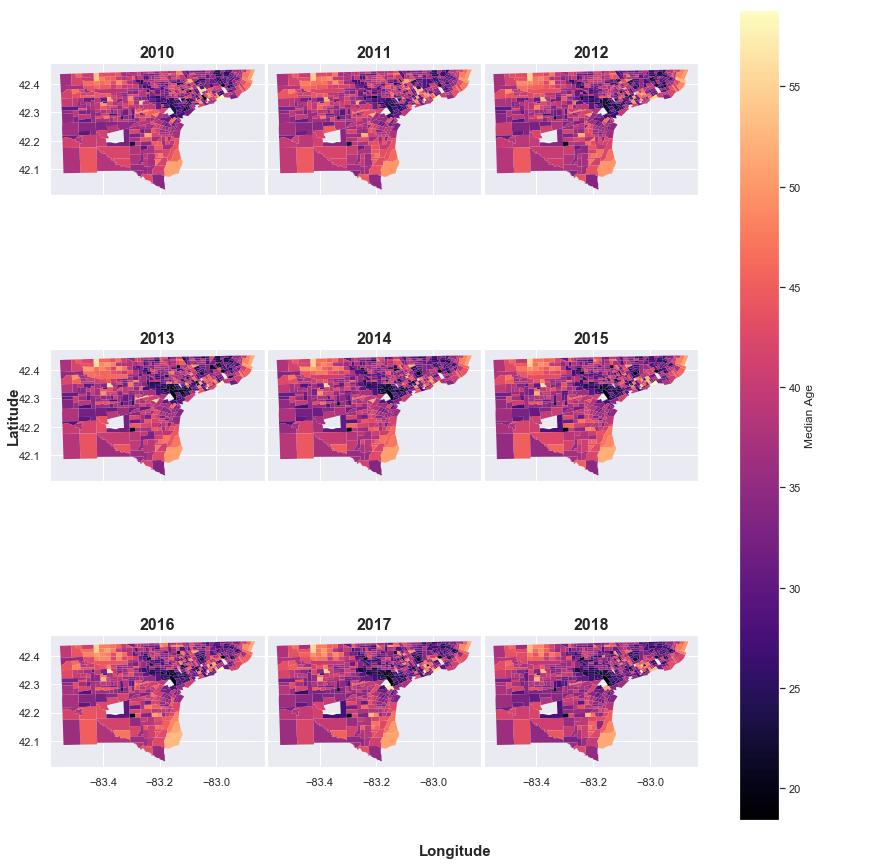

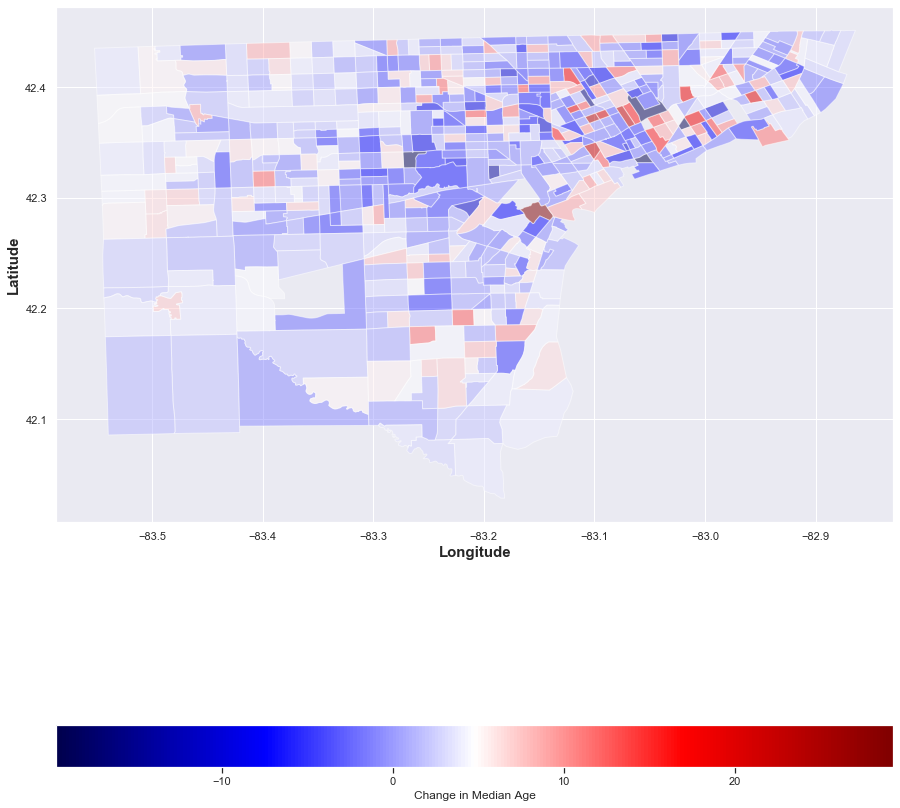

count  mean   std   min  \
Percent White                                      5409.000 0.428 0.375 0.000   
Percent Black                                      5409.000 0.473 0.410 0.000   
Percent American Indian and Alaska Native          5409.000 0.003 0.007 0.000   
Percent Asian                                      5409.000 0.023 0.057 0.000   
Percent Native Hawaiian and Other Pacific Islander 5409.000 0.000 0.002 0.000   
Percent Other Race                                 5409.000 0.002 0.006 0.000   
Percent Multiracial                                5409.000 0.019 0.021 0.000   
Percent Hispanic                                   5409.000 0.052 0.123 0.000   

                                                     25%   50%   75%   max  
Percent White                                      0.036 0.351 0.829 0.996  
Percent Black                                      0.052 0.359 0.925 1.000  
Percent American Indian and Alaska Native          0.000 0.000 0.003 0.133  
Percent Asian                                      0.000 0.002 0.019 0.774  
Percent Native Hawaiian and Other Pacific Islander 0.000 0.000 0.000 0.038  
Percent Other Race                                 0.000 0.000 0.000 0.075  
Percent Multiracial                                0.004 0.013 0.027 0.262  
Percent Hispanic                                   0.004 0.018 0.045 0.889

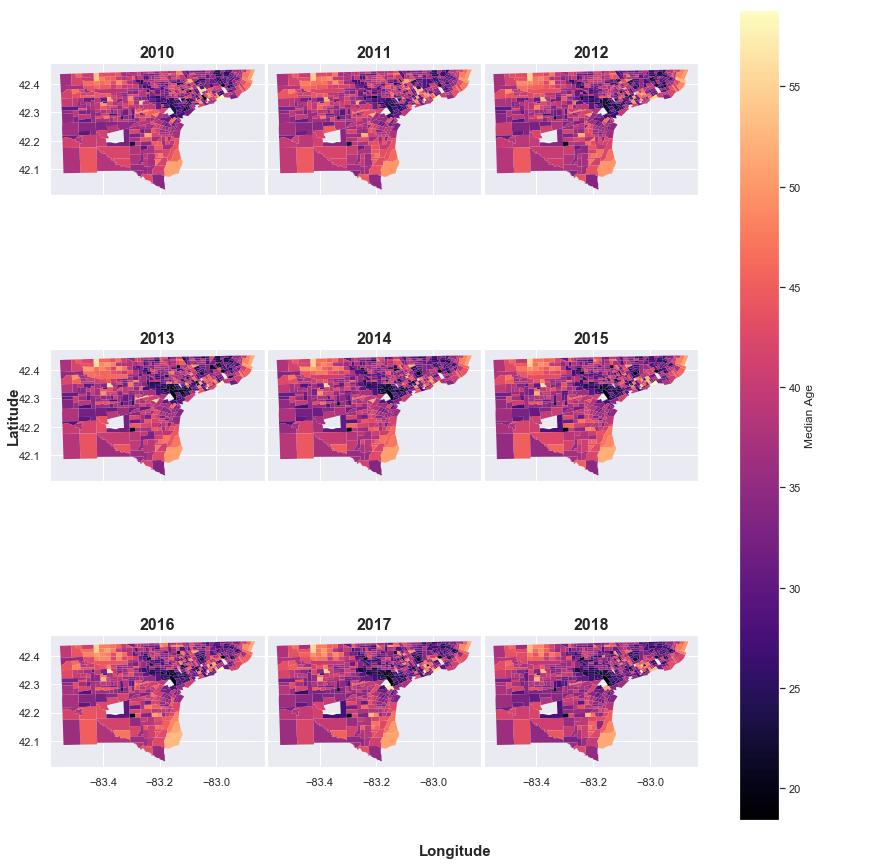

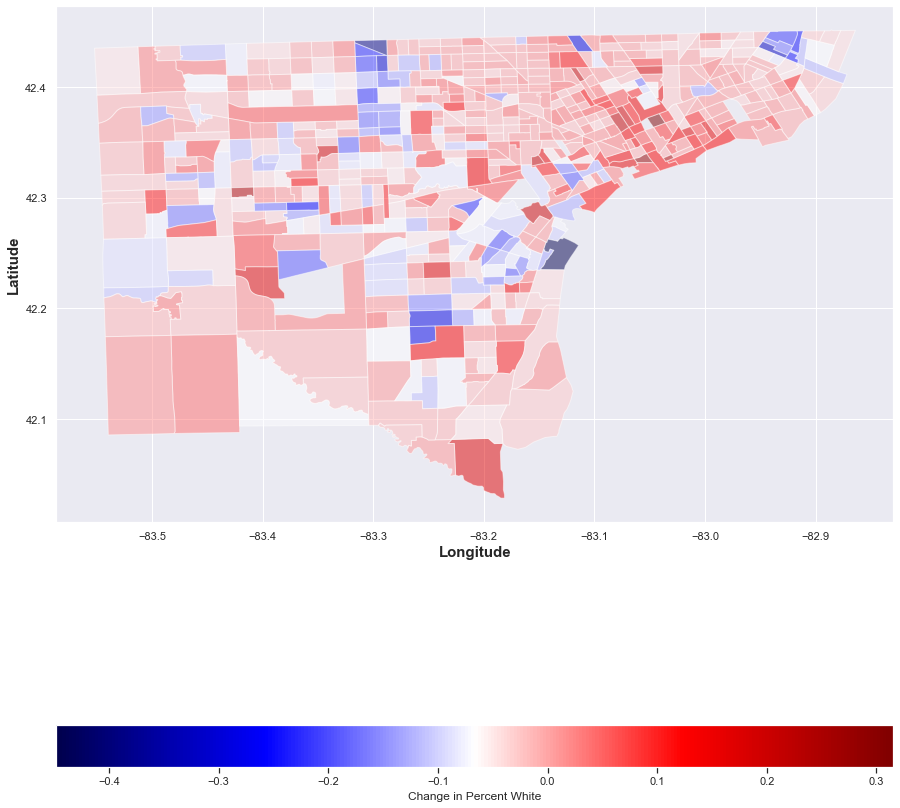

count     5404.000
mean     43218.105
std      25410.219
min       8733.000
25%      24904.250
50%      36087.000
75%      54809.250
max     203882.000
Name: Median Annual Household Income, dtype: float64

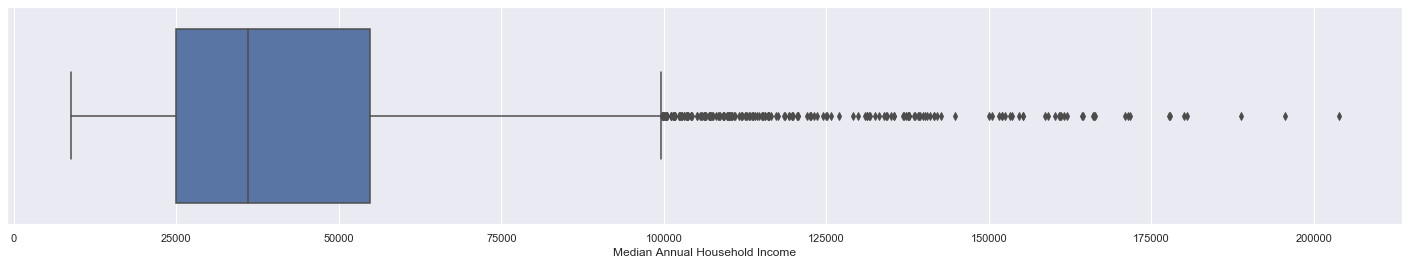

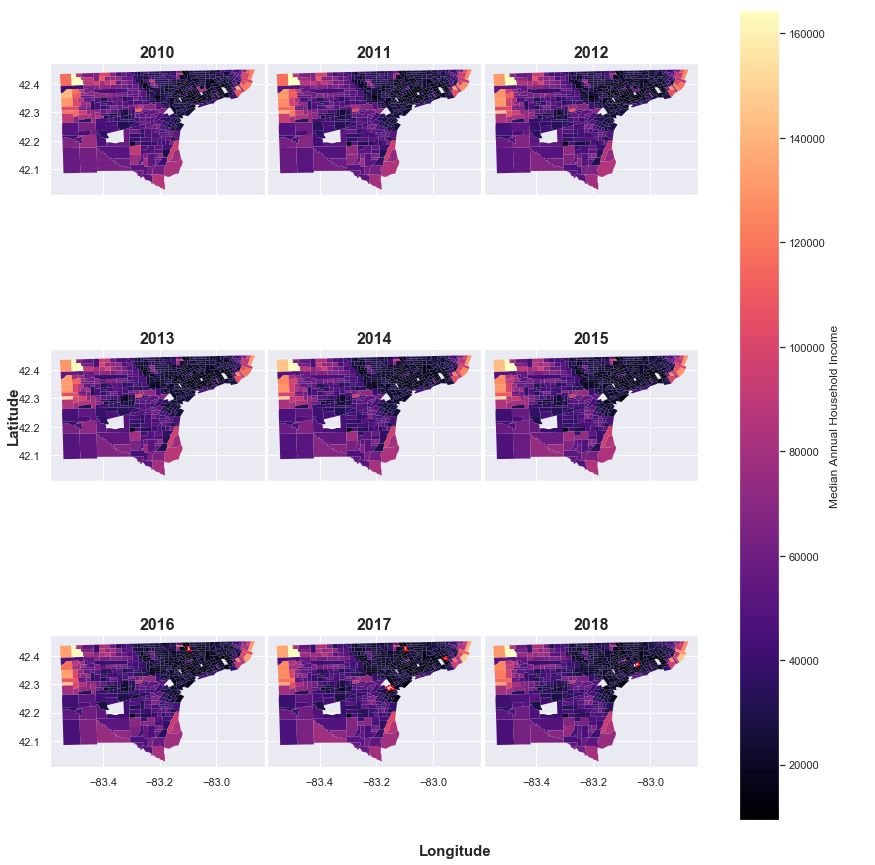

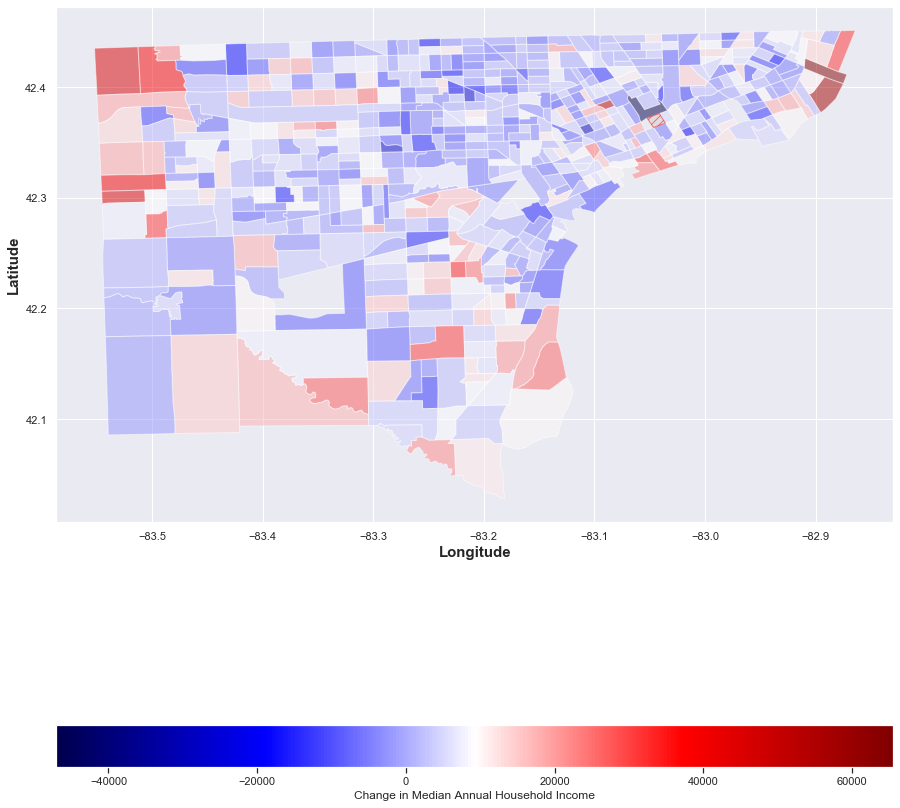

count   5409.000
mean     890.297
std      315.924
min      245.000
25%      688.000
50%      829.000
75%      991.000
max     2849.000
Name: Median Monthly Housing Costs, dtype: float64

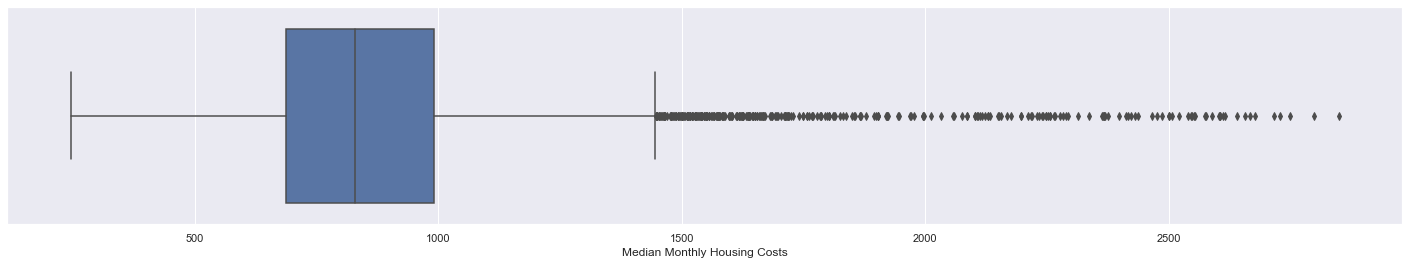

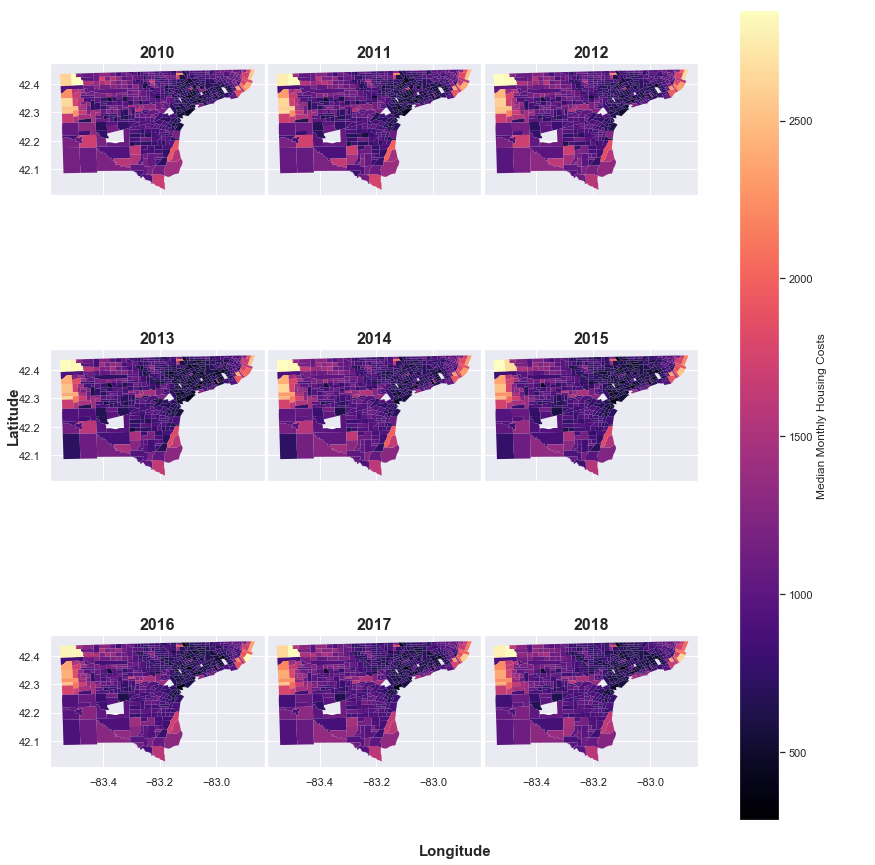

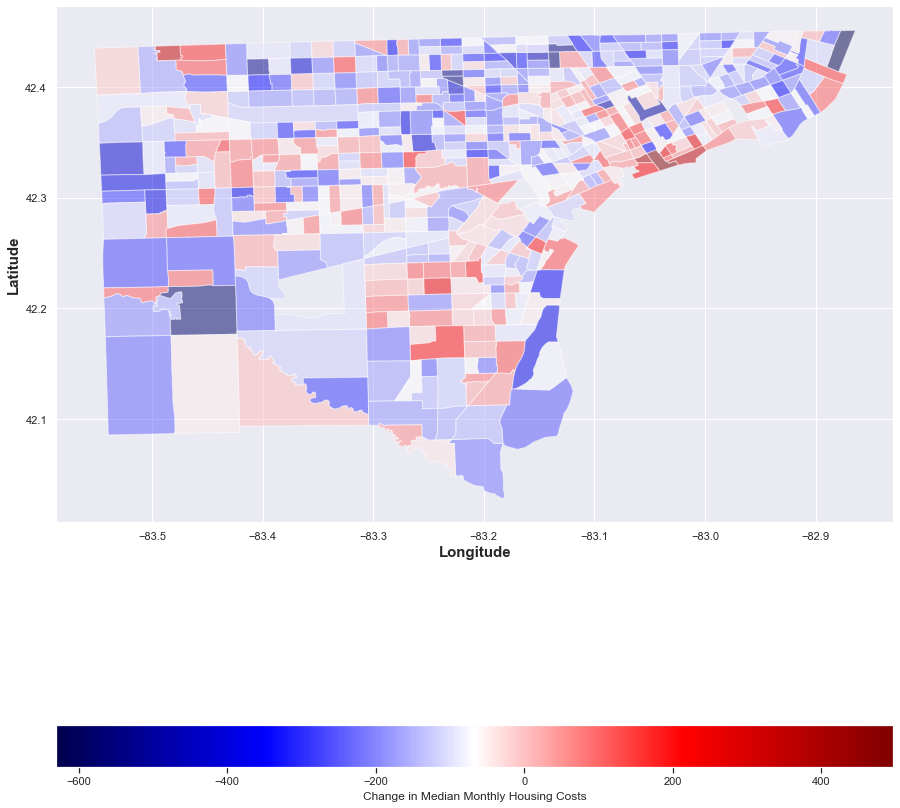

count   5409.000
mean       0.275
std        0.147
min        0.000
25%        0.168
50%        0.244
75%        0.358
max        1.000
Name: Percent White Collar, dtype: float64

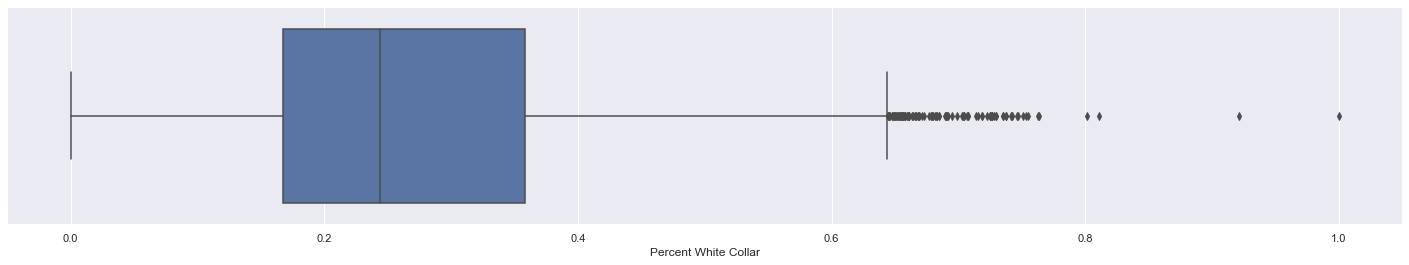

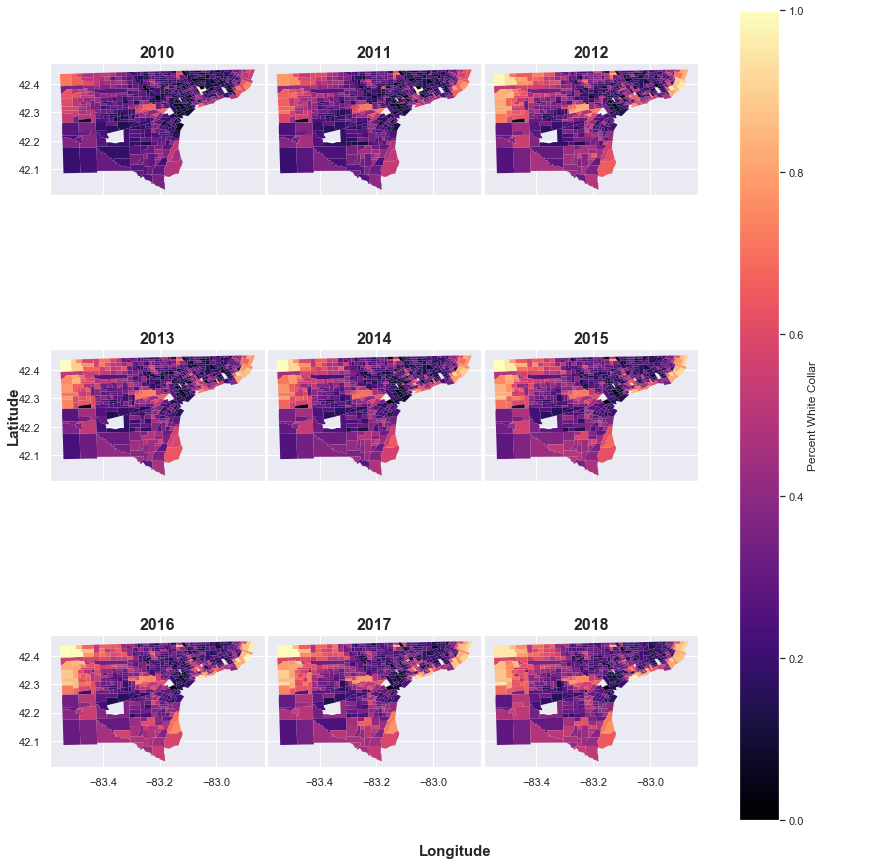

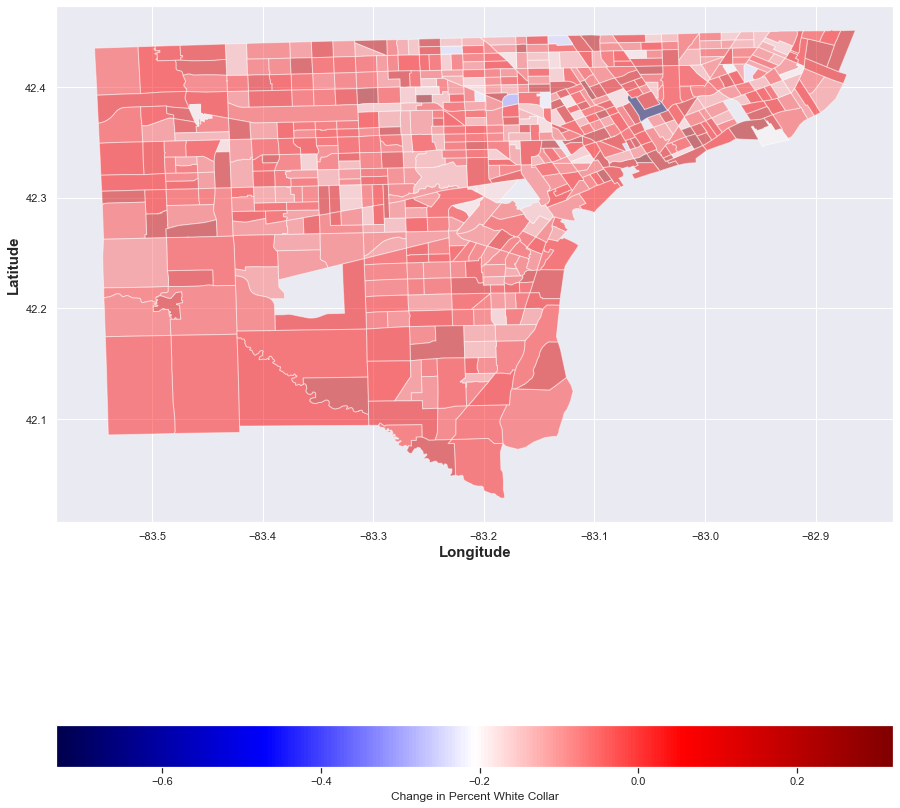

count   5409.000
mean       0.265
std        0.168
min        0.000
25%        0.146
50%        0.215
75%        0.342
max        0.851
Name: Percent College Graduate, dtype: float64

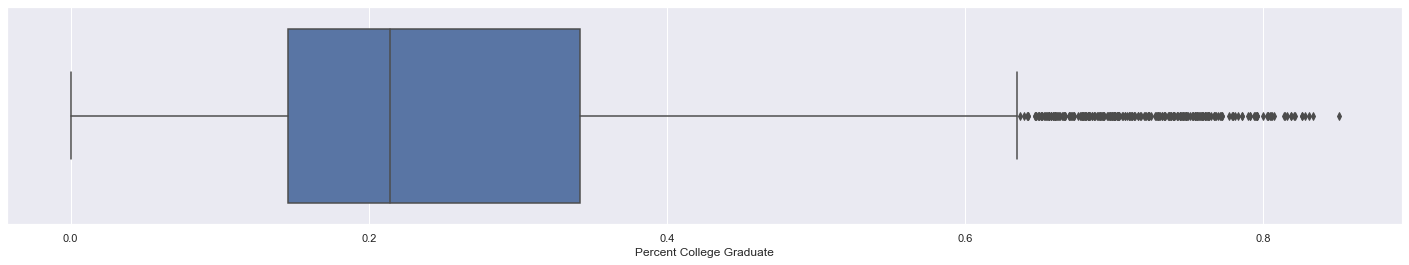

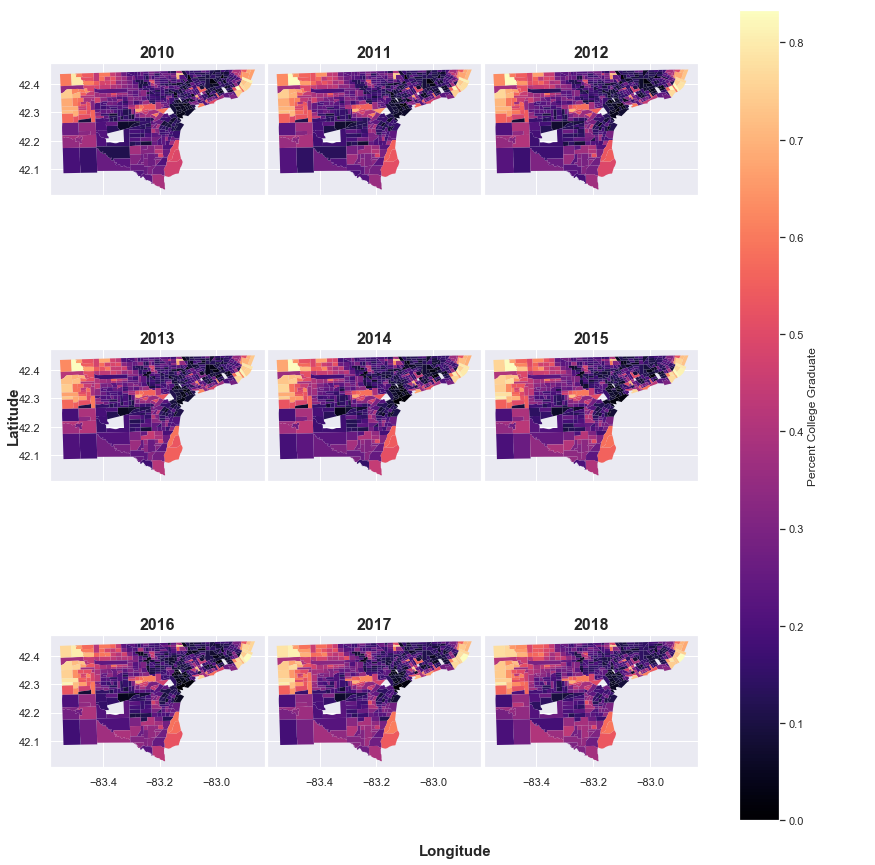

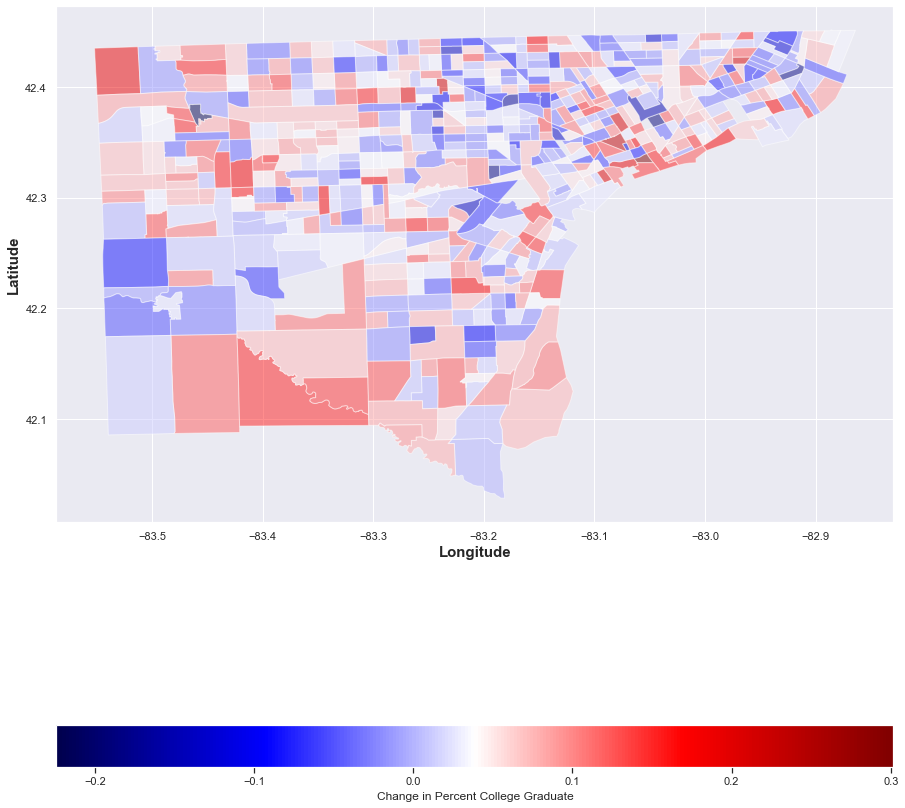

count     5315.000
mean     96454.919
std      74662.243
min       9999.000
25%      45600.000
50%      74700.000
75%     122300.000
max     604300.000
Name: Median Value for Owner Occupied Housing Units, dtype: float64

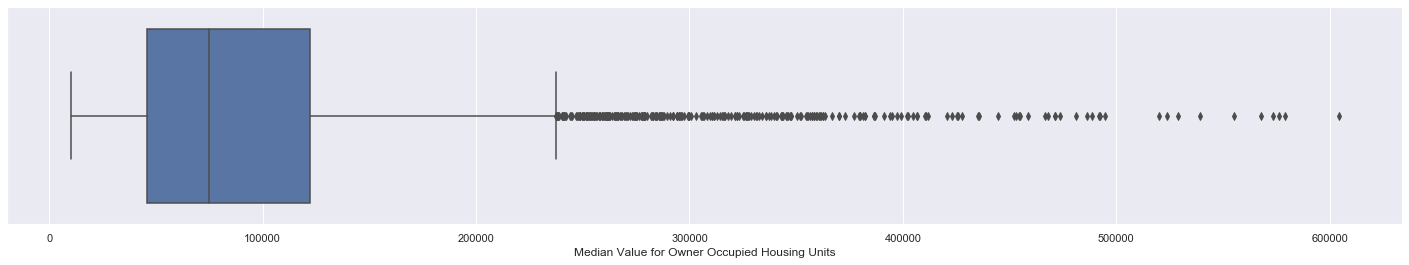

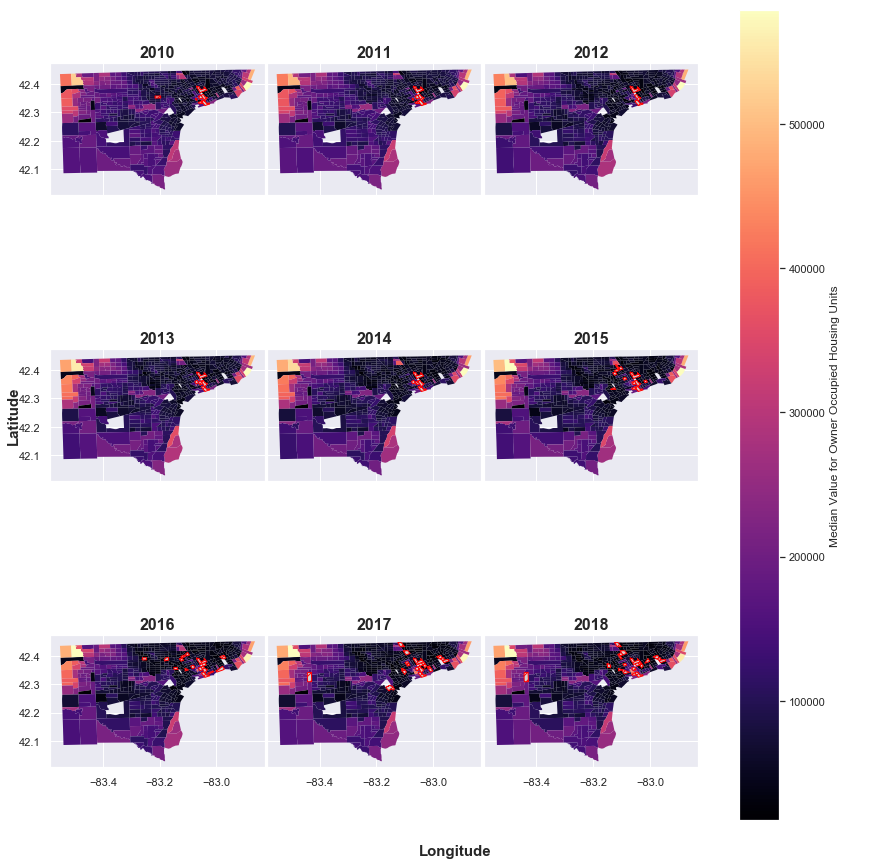

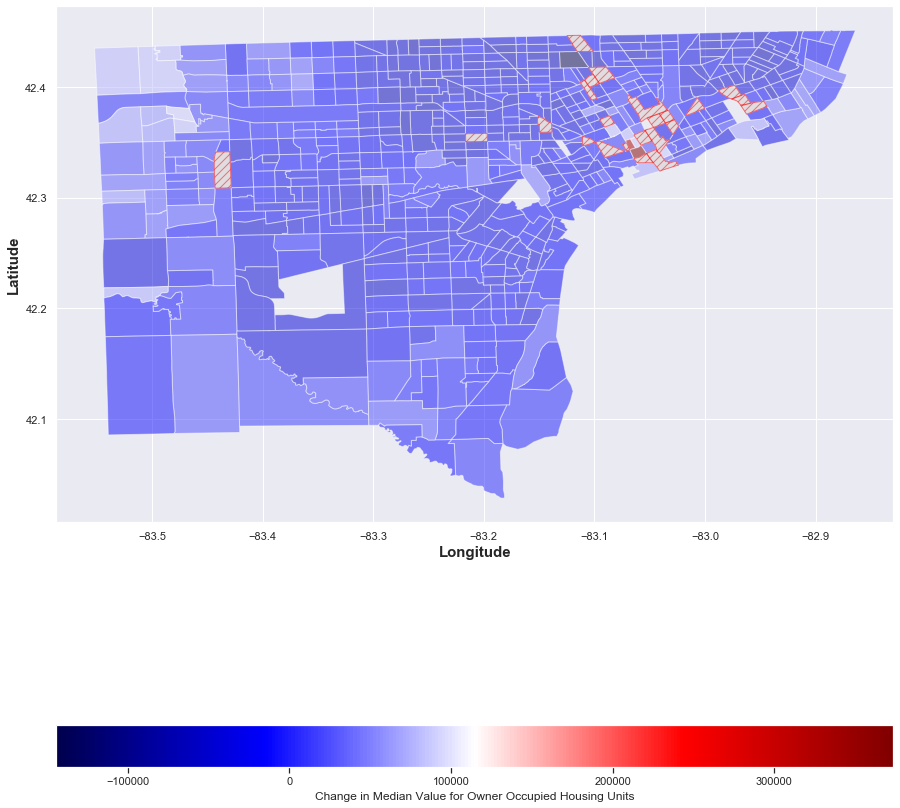

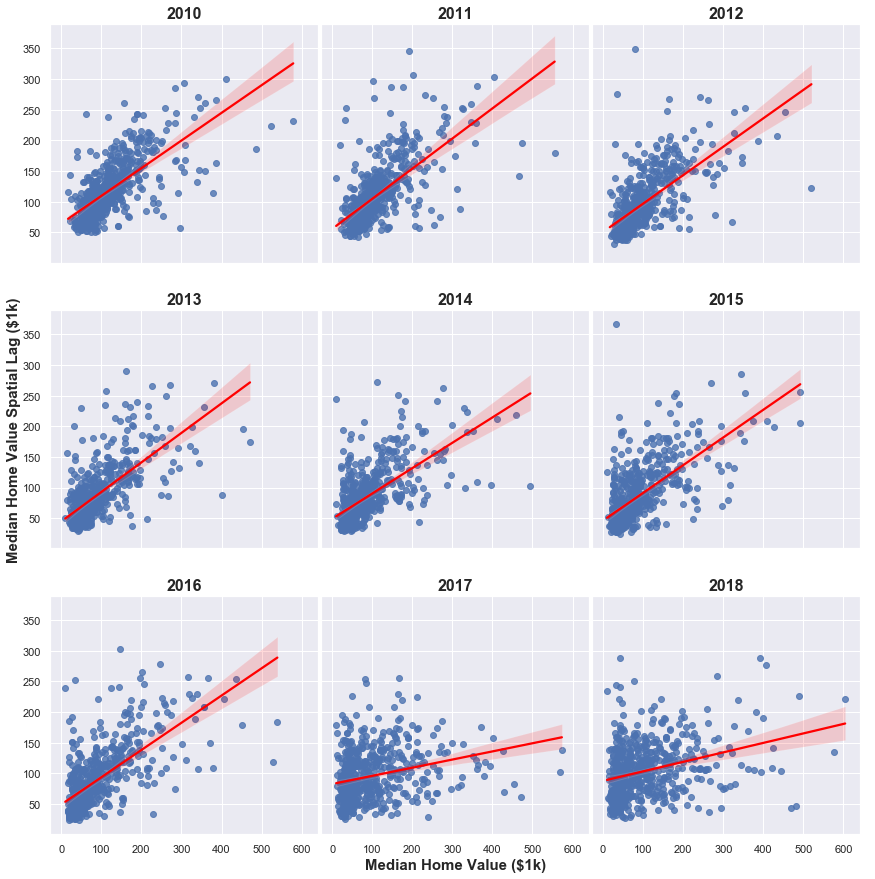

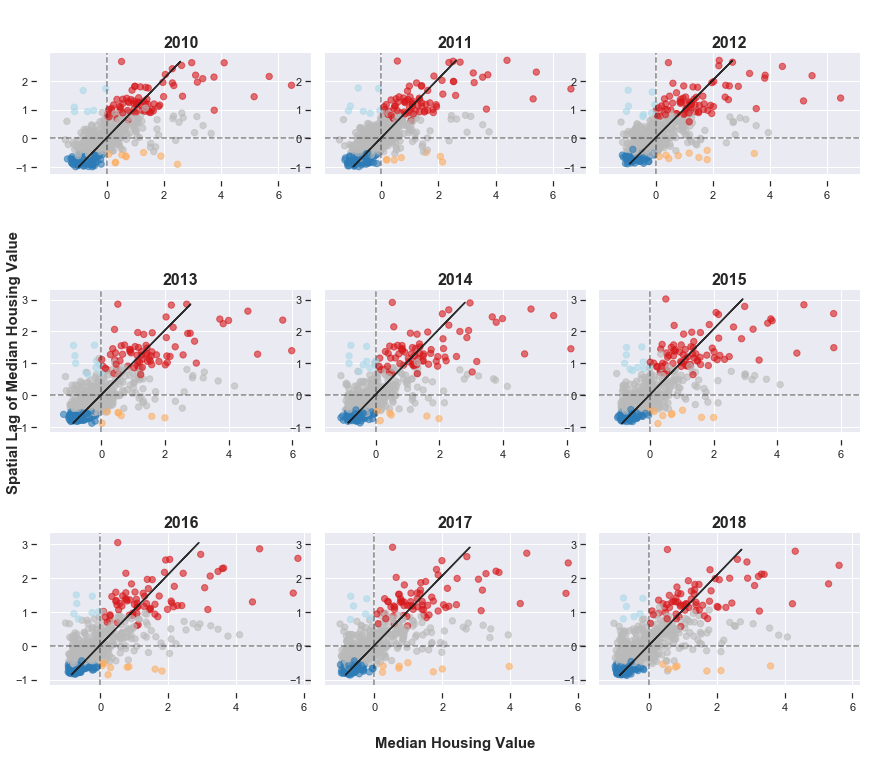

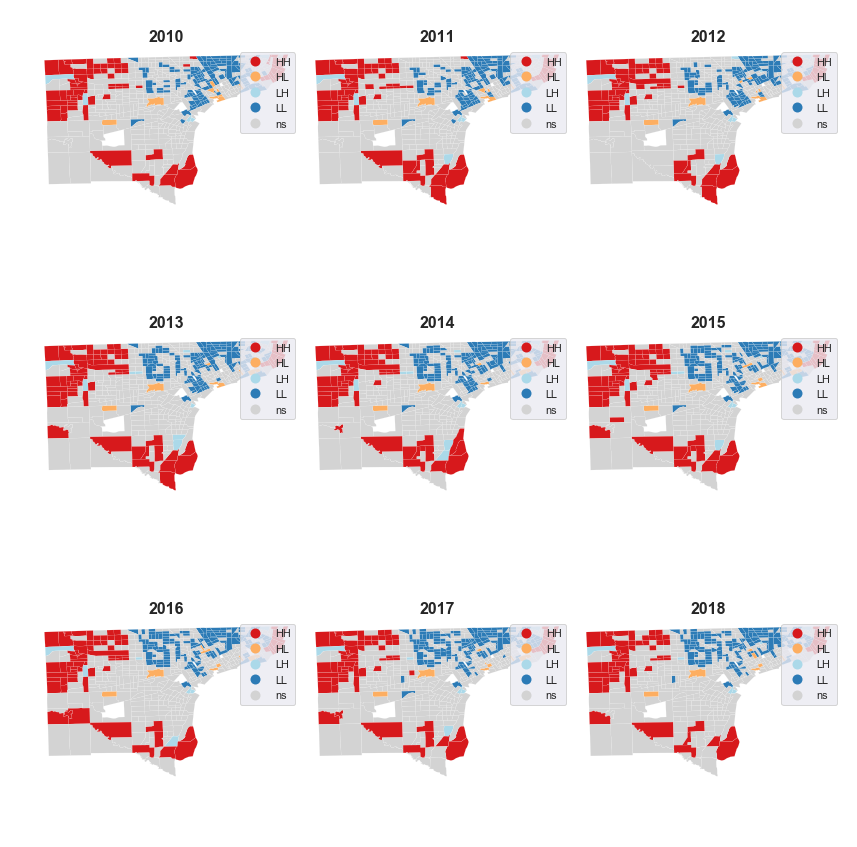

In [13]:
vh.run_report(city_gdf, w.value)